In [1]:
#!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split

Loading and exploring the dataset

In [3]:
train_df = pd.read_csv('train.csv').fillna(" ")
train_df.sample(10,random_state = 1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24915,41e65f43c180838e,"YOU ARE A FAT, GEEKY PRICK WHO HAS NOTHING TO ...",1,1,1,0,1,0
75819,cade9e425d75948e,Agent X2: Basically thanks - with a 'little' m...,0,0,0,0,0,0
53891,8ff87747403ed2e6,Why are my posts being deleted? \n\nI have tri...,0,0,0,0,0,0
154159,a95604c7a938abb3,"""\n\n Controlled Demolitions and Common Sense ...",0,0,0,0,0,0
13040,2288910537399728,I do not understand your reply. //Blaxthos ( ...,0,0,0,0,0,0
123190,9309014f225e9975,Is this the bizarro world? Removing content is...,0,0,0,0,0,0
33626,59a295885d985ef1,"Well, WP:RS says that articles should use reli...",0,0,0,0,0,0
1150,031c15507901e54a,Oh hear me go someone removes all my pages i g...,0,0,0,0,0,0
48633,820b548b9acc1ee6,can't believe this article was deleted\nI'm su...,0,0,0,0,0,0
42817,723d53b4406dc45a,"""\n\n Comments on GamerGate Workshop page \n\n...",0,0,0,0,0,0


In [16]:
x= train_df['comment_text'].values

In [10]:
train_df[train_df['toxic']==1]


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


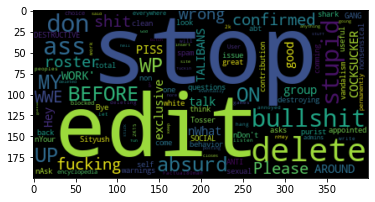

In [12]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

comments = train_df['comment_text'].loc[train_df['toxic']==1].values
wordcloud =WordCloud(stopwords= STOPWORDS).generate(str(comments))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

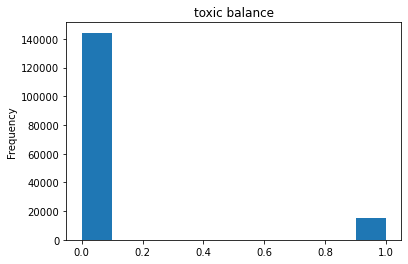

In [14]:
train_df['toxic'].plot(kind = 'hist', title = 'toxic balance')

Tokenizing and Pad Text Data

In [15]:
max_features = 20000
max_text_length = 400


In [17]:
x_tokeniser = text.Tokenizer(max_features)
x_tokeniser.fit_on_texts(list(x)) 
x_tokenized = x_tokeniser.texts_to_sequences(x) # converting it to numbers
# for adding the padding to make it 400 as the max lenght of the text
x_train_val = sequence.pad_sequences(x_tokenized,maxlen=max_text_length)